## DBSCAN & Aggolmerative Clustering

In this video we're going to look at applying clustering with:
1. Agglomerativate Clustering
2. DBSCAN

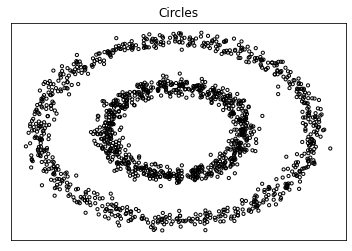

In [1]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X, y = datasets.make_circles(n_samples=1500, factor=0.5, noise=.05)
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10, facecolors='none', edgecolors='black')
plt.title("Circles")
plt.xticks([])
plt.yticks([])
plt.show()

## Agglomerative Clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

model = cluster.AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

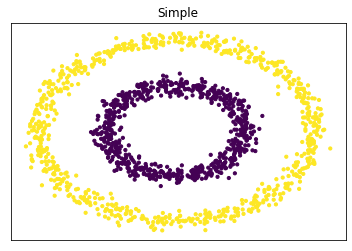

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_)
plt.title("Simple")
plt.xticks([])
plt.yticks([])
plt.show()

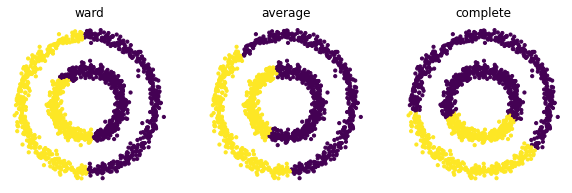

In [4]:
linkages = ['ward', 'average', 'complete']
fig, axs = plt.subplots(1, len(linkages), figsize=(10,3))
for idx, linkage in enumerate(linkages):
    
    model = cluster.AgglomerativeClustering(n_clusters=2, linkage=linkage).fit(X)
    
    axs[idx].scatter(X[:, 0], X[:, 1], s=10, c=model.labels_)
    axs[idx].set_axis_off()
    axs[idx].set_title(linkage)


plt.axis('off')
plt.show()

## Plot Dendrogram

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

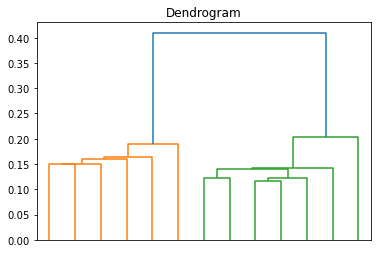

In [5]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, no_labels=True)

model = cluster.AgglomerativeClustering(distance_threshold=0.05, n_clusters=None, linkage='single').fit(X)    
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=5)
plt.show()

In [6]:
X.shape

(1500, 2)

### DBSCAN

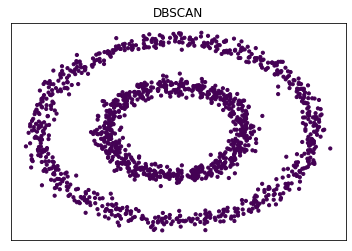

In [7]:
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(X)
model = DBSCAN(eps=0.5, min_samples=3).fit(X)

plt.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_)
plt.title("DBSCAN")
plt.xticks([])
plt.yticks([])
plt.show()

### Finding value for epsilon

Source Paper: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

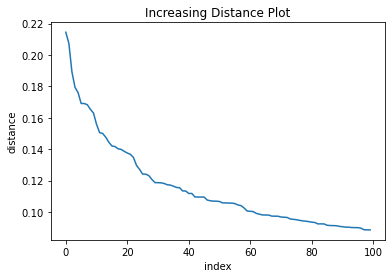

In [8]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = np.flip(distances[:,2])
distances = distances[0:100]
plt.plot(distances)
plt.title("Increasing Distance Plot")
plt.xlabel("index")
plt.ylabel("distance")
plt.show()

In [9]:
neigh

NearestNeighbors(n_neighbors=3)

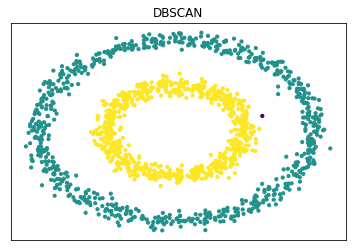

In [10]:
model = DBSCAN(eps=0.2, min_samples=3).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_)
plt.title("DBSCAN")
plt.xticks([])
plt.yticks([])
plt.show()

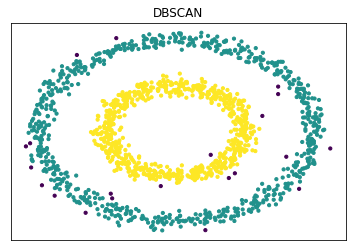

In [11]:
model = DBSCAN(eps=0.12, min_samples=3).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_)
plt.title("DBSCAN")
plt.xticks([])
plt.yticks([])
plt.show()


In [12]:
np.unique(model.labels_)

array([-1,  0,  1])